## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 55s 5us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [14]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal

In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## 1. 2-hidden layer architecture (784-352-124-10)

 <h3> 1.1 MLP + ReLU activation + ADAM Optimizer </h3>

In [15]:
model_relu = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 352)               276320    
_________________________________________________________________
dense_2 (Dense)              (None, 124)               43772     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1250      
Total params: 321,342
Trainable params: 321,342
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2540 - acc: 0.9269 - val_loss: 0.1213 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0975 - acc: 0.9714 - val_los

Test score: 0.08760498947395635
Test accuracy: 0.9816


<IPython.core.display.Javascript object>


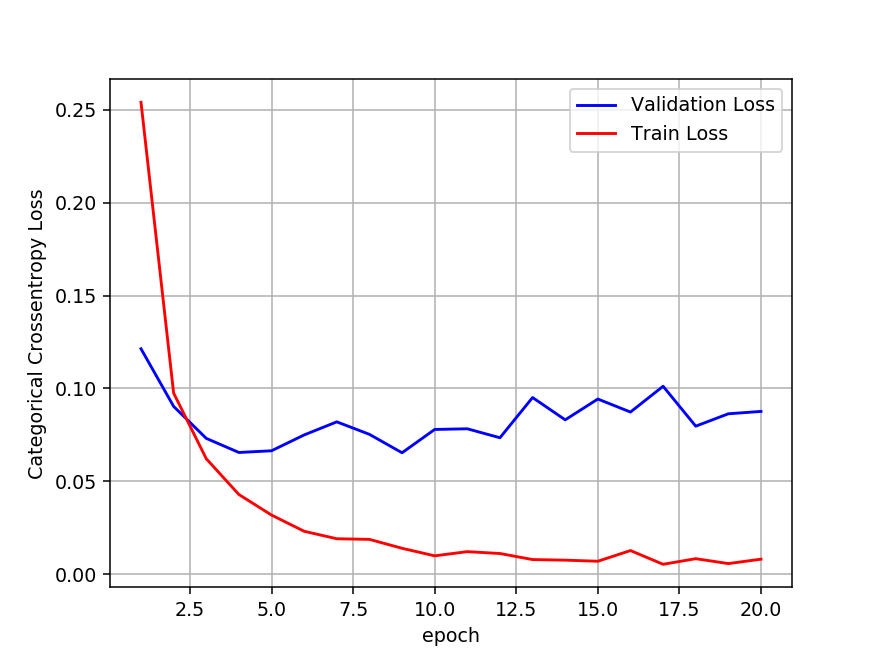

In [16]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>1.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [17]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 352)               276320    
_________________________________________________________________
batch_normalization_1 (Batch (None, 352)               1408      
_________________________________________________________________
dense_5 (Dense)              (None, 124)               43772     
_________________________________________________________________
batch_normalization_2 (Batch (None, 124)               496       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1250      
Total params: 323,246
Trainable params: 322,294
Non-trainable params: 952
_________________________________________________________________


In [18]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2029 - acc: 0.9397 - val_loss: 0.1044 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0770 - acc: 0.9766 - val_loss: 0.0813 - val_acc: 0.9744
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0479 - acc: 0.9853 - val_loss: 0.0742 - val_acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0810 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0276 - acc: 0.9907 - val_loss: 0.0798 - val_acc: 0.9760
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0219 - acc: 0.9934 - val_loss: 0.0760 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0198 - acc: 0.9937 - val_loss: 0.0728 - val_ac

Test score: 0.08438539689127975
Test accuracy: 0.9788


<IPython.core.display.Javascript object>


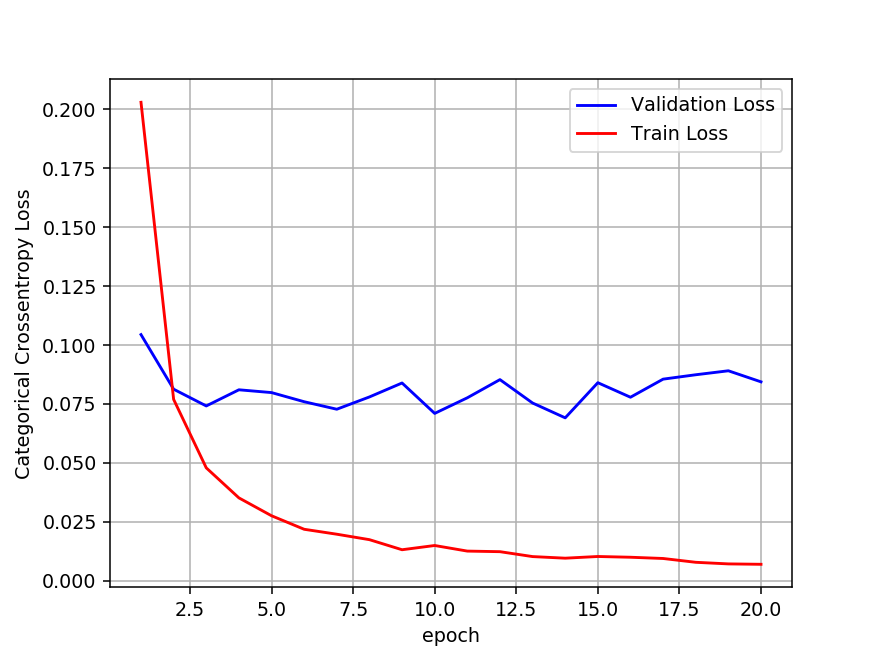

In [19]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 1.3 MLP + Dropout + Adam Optimizer </h2>

In [20]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [21]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.4204 - acc: 0.8730 - val_loss: 0.1374 - val_acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2043 - acc: 0.9384 - val_loss: 0.1108 - val_acc: 0.9642
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1579 - acc: 0.9527 - val_loss: 0.0897 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1358 - acc: 0.9590 - val_loss: 0.0782 - val_acc: 0.9759
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1168 - acc: 0.9640 - val_loss: 0.0707 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1066 - acc: 0.9676 - val_loss: 0.0752 - val_acc: 0.9759
Epoch 7/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1008 - acc: 0.9686 - val_loss: 0.0669 - 

Test score: 0.05628199922235217
Test accuracy: 0.983


<IPython.core.display.Javascript object>


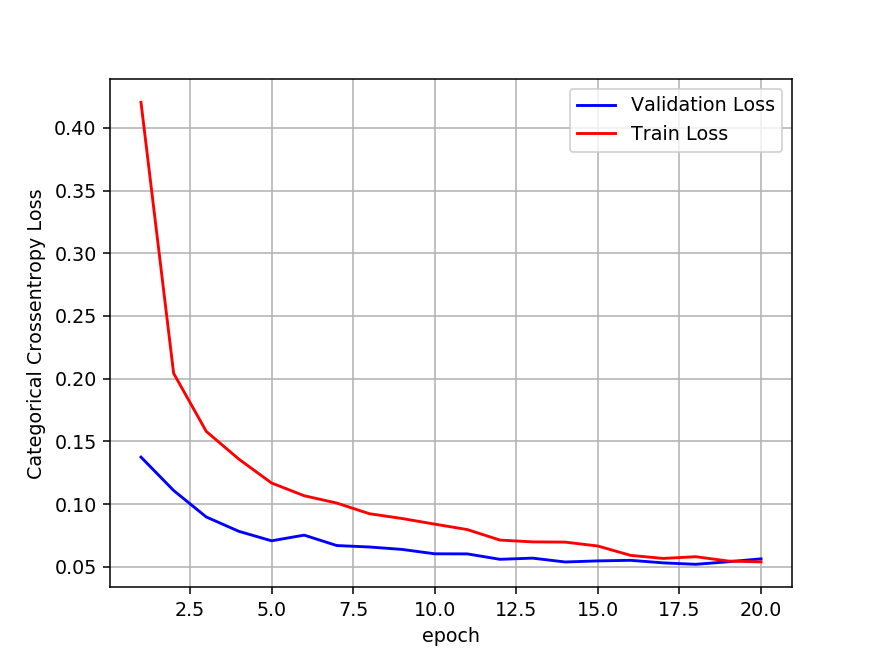

In [22]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2. 3-hidden layer architecture (784-454-232-120-10)

 <h3> 2.1 MLP + ReLU activation + ADAM Optimizer </h3>

In [23]:
model_relu = Sequential()
model_relu.add(Dense(454, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(232, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(120, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 454)               356390    
_________________________________________________________________
dense_11 (Dense)             (None, 232)               105560    
_________________________________________________________________
dense_12 (Dense)             (None, 120)               27960     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1210      
Total params: 491,120
Trainable params: 491,120
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.2340 - acc: 0.9310 - val_loss: 0.1052 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - lo

Test score: 0.11779277188464211
Test accuracy: 0.9778


<IPython.core.display.Javascript object>


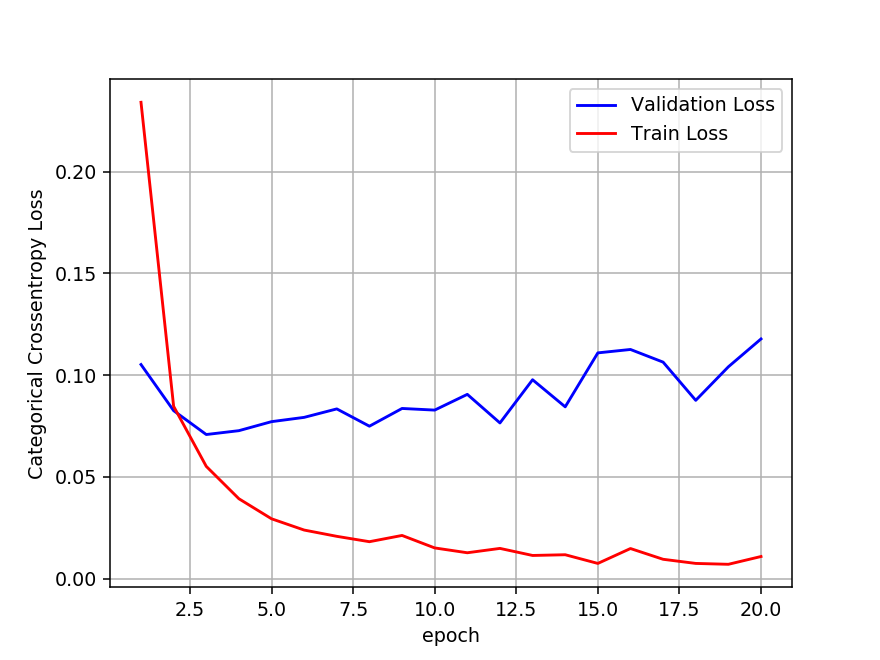

In [24]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [25]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(454, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(232, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(120, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 454)               356390    
_________________________________________________________________
batch_normalization_5 (Batch (None, 454)               1816      
_________________________________________________________________
dense_15 (Dense)             (None, 232)               105560    
_________________________________________________________________
batch_normalization_6 (Batch (None, 232)               928       
_________________________________________________________________
dense_16 (Dense)             (None, 120)               27960     
_________________________________________________________________
batch_normalization_7 (Batch (None, 120)               480       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1210      
Total para

In [26]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1944 - acc: 0.9408 - val_loss: 0.1134 - val_acc: 0.9649
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0745 - acc: 0.9767 - val_loss: 0.0873 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0482 - acc: 0.9852 - val_loss: 0.0854 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0816 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0293 - acc: 0.9908 - val_loss: 0.0736 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0774 - val_acc: 0.9754
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0807 -

Test score: 0.07667597182277495
Test accuracy: 0.9809


<IPython.core.display.Javascript object>


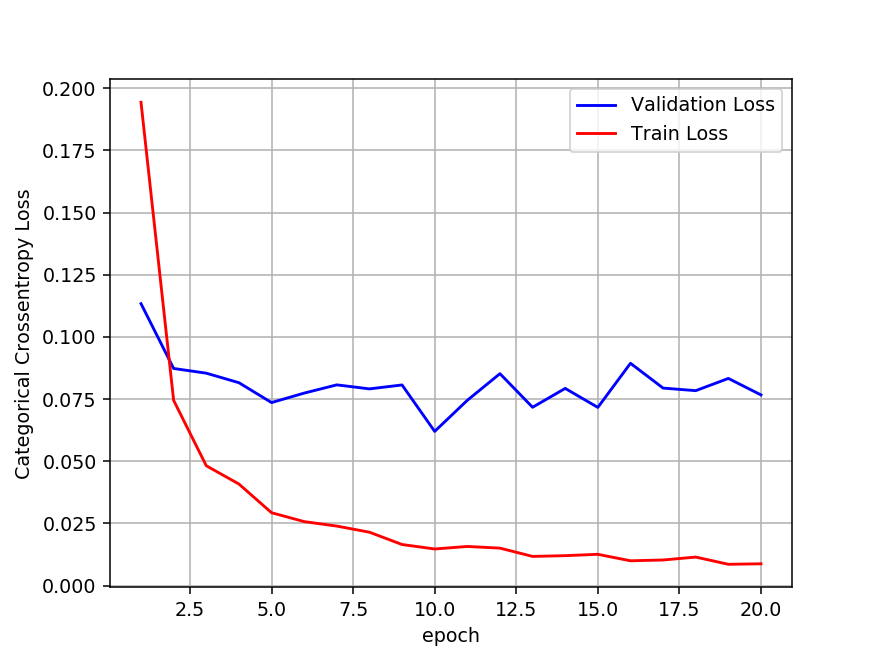

In [27]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 2.3 MLP + Dropout + Adam Optimizer </h2>

In [28]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(454, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(232, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(120, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 454)               356390    
_________________________________________________________________
batch_normalization_8 (Batch (None, 454)               1816      
_________________________________________________________________
dropout_3 (Dropout)          (None, 454)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 232)               105560    
_________________________________________________________________
batch_normalization_9 (Batch (None, 232)               928       
_________________________________________________________________
dropout_4 (Dropout)          (None, 232)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 120)               27960     
__________

In [29]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.6018 - acc: 0.8176 - val_loss: 0.1744 - val_acc: 0.9470
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2632 - acc: 0.9222 - val_loss: 0.1235 - val_acc: 0.9624
Epoch 3/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2041 - acc: 0.9395 - val_loss: 0.1069 - val_acc: 0.9677
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1701 - acc: 0.9496 - val_loss: 0.0942 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1459 - acc: 0.9572 - val_loss: 0.0813 - val_acc: 0.9748
Epoch 6/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.1348 - acc: 0.9599 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1255 - acc: 0.9629 - val_loss: 0.

Test score: 0.05740614543475094
Test accuracy: 0.9857


<IPython.core.display.Javascript object>


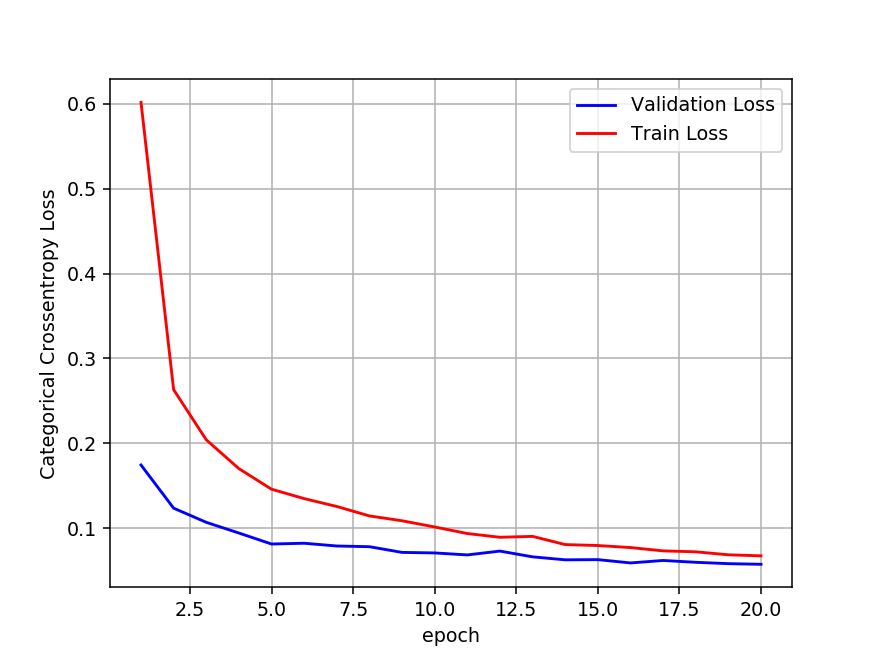

In [30]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3. 5-hidden layer architecture (784-320-280-230-160-80-10)

 <h3> 3.1 MLP + ReLU activation + ADAM Optimizer </h3>

In [31]:
model_relu = Sequential()
model_relu.add(Dense(320, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(280, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(160, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_23 (Dense)             (None, 280)               89880     
_________________________________________________________________
dense_24 (Dense)             (None, 230)               64630     
_________________________________________________________________
dense_25 (Dense)             (None, 160)               36960     
_________________________________________________________________
dense_26 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                810       
Total params: 456,360
Trainable params: 456,360
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.09238322618362185
Test accuracy: 0.9812


<IPython.core.display.Javascript object>


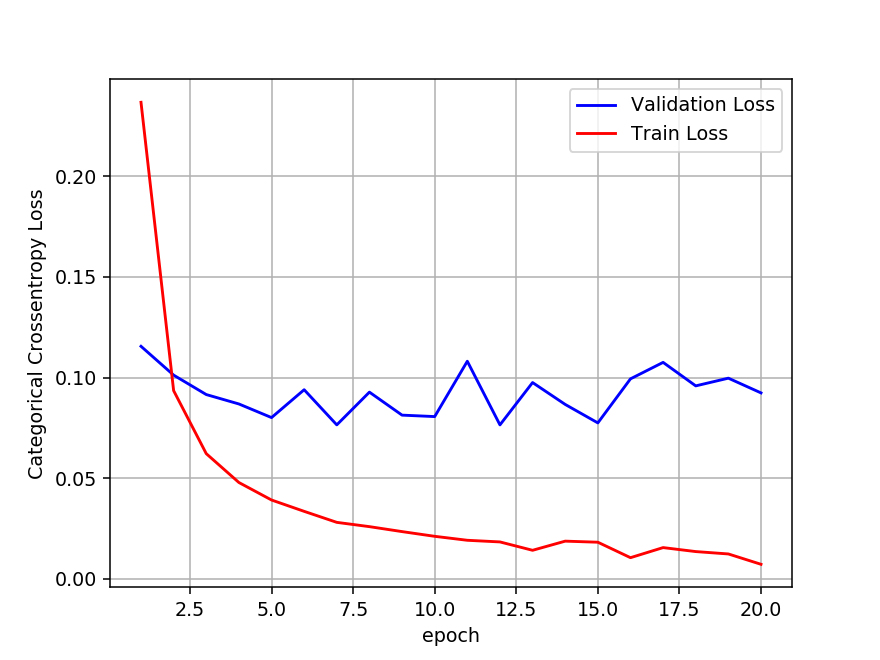

In [32]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [33]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(320, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(280, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(160, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 320)               251200    
_________________________________________________________________
batch_normalization_11 (Batc (None, 320)               1280      
_________________________________________________________________
dense_29 (Dense)             (None, 280)               89880     
_________________________________________________________________
batch_normalization_12 (Batc (None, 280)               1120      
_________________________________________________________________
dense_30 (Dense)             (None, 230)               64630     
_________________________________________________________________
batch_normalization_13 (Batc (None, 230)               920       
_________________________________________________________________
dense_31 (Dense)             (None, 160)               36960     
__________

In [34]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.2278 - acc: 0.9324 - val_loss: 0.1180 - val_acc: 0.9658
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0869 - acc: 0.9731 - val_loss: 0.0921 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0596 - acc: 0.9808 - val_loss: 0.0831 - val_acc: 0.9722
Epoch 4/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0482 - acc: 0.9842 - val_loss: 0.0878 - val_acc: 0.9730
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0403 - acc: 0.9863 - val_loss: 0.0907 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0339 - acc: 0.9892 - val_loss: 0.0968 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0306 - acc: 0.9895 - val_loss: 0.0820 -

Test score: 0.0813284714843132
Test accuracy: 0.9796


<IPython.core.display.Javascript object>


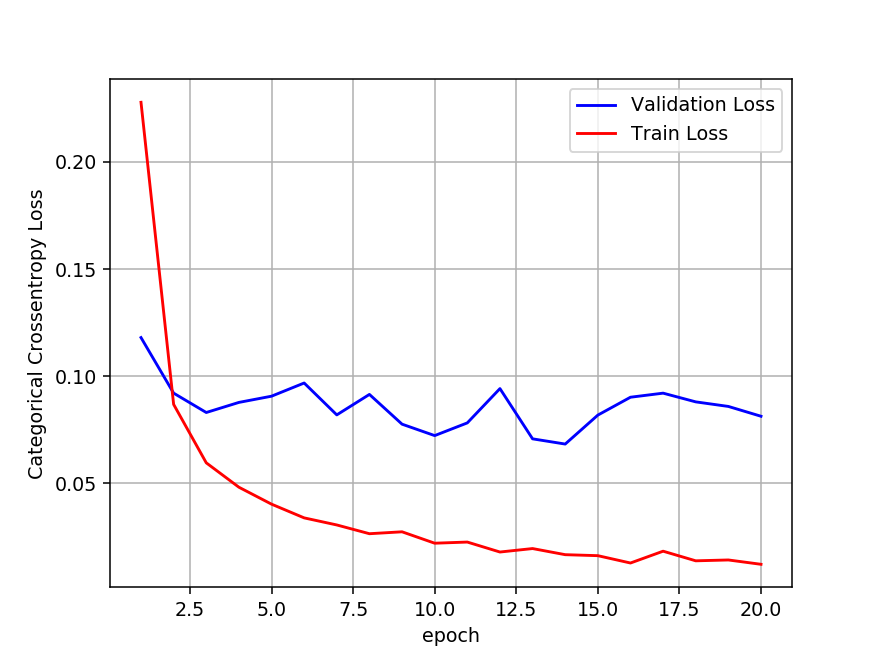

In [35]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3.3 MLP + Dropout + Adam Optimizer </h2>

In [36]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(320, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(280, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(160, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 320)               251200    
_________________________________________________________________
batch_normalization_16 (Batc (None, 320)               1280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 280)               89880     
_________________________________________________________________
batch_normalization_17 (Batc (None, 280)               1120      
_________________________________________________________________
dropout_7 (Dropout)          (None, 280)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 230)               64630     
__________

In [37]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 280us/step - loss: 1.1816 - acc: 0.6242 - val_loss: 0.2850 - val_acc: 0.9147
Epoch 2/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.4393 - acc: 0.8740 - val_loss: 0.1872 - val_acc: 0.9476
Epoch 3/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.3221 - acc: 0.9100 - val_loss: 0.1546 - val_acc: 0.9544
Epoch 4/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.2687 - acc: 0.9280 - val_loss: 0.1426 - val_acc: 0.9600
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.2335 - acc: 0.9384 - val_loss: 0.1239 - val_acc: 0.9668
Epoch 6/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.2128 - acc: 0.9434 - val_loss: 0.1096 - val_acc: 0.9716
Epoch 7/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.1909 - acc: 0.9496 - val_loss: 0.

Test score: 0.07577368428185582
Test accuracy: 0.9806


<IPython.core.display.Javascript object>


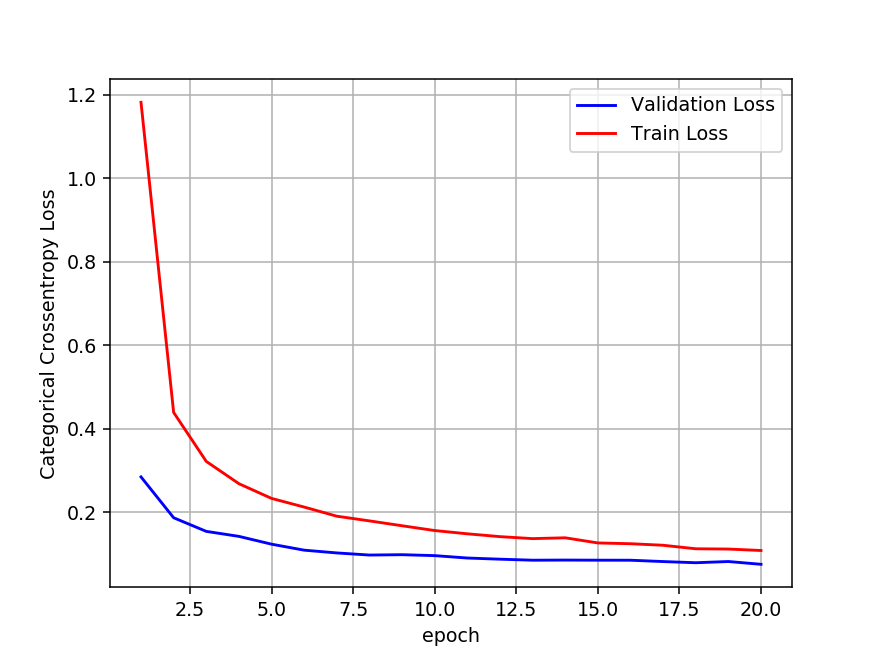

In [38]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 4. CONCLUSION

In [40]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Numer of Layers", "BN","Dropout", "Accuracy"]
x.add_row(["2", 'NO',"NO", 0.981])
x.add_row(["2", 'YES','NO', 0.978])
x.add_row(["2", 'NO',0.5, 0.983])

x.add_row(["3", 'NO',"NO", 0.977])
x.add_row(["3", 'YES','NO', 0.980])
x.add_row(["3", 'NO',0.5, 0.985])

x.add_row(["5", 'NO','NO', 0.981])
x.add_row(["5", 'YES','NO', 0.979])
x.add_row(["5", 'NO',0.5, 0.980])
print(x)

+-----------------+-----+---------+----------+
| Numer of Layers |  BN | Dropout | Accuracy |
+-----------------+-----+---------+----------+
|        2        |  NO |    NO   |  0.981   |
|        2        | YES |    NO   |  0.978   |
|        2        |  NO |   0.5   |  0.983   |
|        3        |  NO |    NO   |  0.977   |
|        3        | YES |    NO   |   0.98   |
|        3        |  NO |   0.5   |  0.985   |
|        5        |  NO |    NO   |  0.981   |
|        5        | YES |    NO   |  0.979   |
|        5        |  NO |   0.5   |   0.98   |
+-----------------+-----+---------+----------+
